### Imports

In [216]:
import warnings
warnings.filterwarnings('ignore')

In [217]:
import pandas as pd
import numpy as np
np.random.seed(0)
# SK-learn libraries for learning.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [218]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
from sklearn.svm import SVC

In [221]:
import seaborn as sns

In [222]:
%matplotlib inline

### Helper functions

In [223]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y)/len(y)

### Data loading and cleanup

In [224]:
df = pd.read_csv("~/Downloads/Data/forest-cover-type-prediction/train.csv")

In [225]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [226]:
df.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [227]:
#checking missing
df.isna().any().any()

False

In [228]:
data = df.set_index('Id')
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [229]:
Y = data.loc[:,'Cover_Type']

In [230]:
# Number of instances belonging to each class
# We see that all classes have an equal presence. No class re-balancing is necessary
# Class distribution
Y.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [231]:
X = data.drop('Cover_Type', axis=1)

In [232]:
X.isna().any().any()

False

#### Normalize data
Remove any columns/features that have zero standard deviation, since these don't vary across the data

In [233]:
ix = X.std() == 0
X1 = X.loc[:,~ix]

In [234]:
X.columns[ix]

Index(['Soil_Type7', 'Soil_Type15'], dtype='object')

In [235]:
X1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [236]:
#X.loc[:,ix] = 
X = (X1 - X1.mean())/X1.std()

In [237]:
# Shuffling so that data isn't accidently in some order introducing bias
shuffle = np.random.permutation(X.index)

In [238]:
X.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            15111, 15112, 15113, 15114, 15115, 15116, 15117, 15118, 15119,
            15120],
           dtype='int64', name='Id', length=15120)

In [239]:
X = X.loc[shuffle,:]
X.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
4429,-1.267298,-1.259714,-0.532485,-1.081497,-0.834047,-0.668663,-0.055767,-0.173915,0.106939,-1.054740,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
12400,-1.461227,-0.342248,-0.769061,-1.081497,-0.834047,-0.589422,0.794983,0.571635,-0.219892,-0.784725,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
4648,-1.094916,-0.433086,1.123550,-0.167539,0.766230,-0.632439,1.318521,-0.787897,-1.679740,-0.074684,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
5954,-0.968024,-0.587511,-0.414197,-1.081497,-0.834047,-0.947140,0.893146,0.045364,-0.568513,-0.882003,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
2947,-1.918517,1.728864,-0.414197,-1.081497,-0.834047,-1.157695,-0.612026,-0.042348,0.586292,-0.866548,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934


In [240]:
Y = Y.loc[shuffle]

In [241]:
print('data shape', X.shape)
print('label shape', Y.shape)

data shape (15120, 52)
label shape (15120,)


In [242]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
4429,-1.267298,-1.259714,-0.532485,-1.081497,-0.834047,-0.668663,-0.055767,-0.173915,0.106939,-1.054740,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
12400,-1.461227,-0.342248,-0.769061,-1.081497,-0.834047,-0.589422,0.794983,0.571635,-0.219892,-0.784725,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
4648,-1.094916,-0.433086,1.123550,-0.167539,0.766230,-0.632439,1.318521,-0.787897,-1.679740,-0.074684,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
5954,-0.968024,-0.587511,-0.414197,-1.081497,-0.834047,-0.947140,0.893146,0.045364,-0.568513,-0.882003,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
2947,-1.918517,1.728864,-0.414197,-1.081497,-0.834047,-1.157695,-0.612026,-0.042348,0.586292,-0.866548,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934


In [243]:
# Set some variables to hold dev, and training data.
dev_data, dev_labels = X.iloc[10584:15120,:], Y.iloc[10584:15120]
train_data, train_labels = X.iloc[:10584,], Y.iloc[:10584]
mini_train_data, mini_train_labels = X.iloc[:1000,:], Y.iloc[:1000]

### EDA

In [244]:
X.corrwith(Y).sort_values()

Wilderness_Area1                     -0.230117
Soil_Type29                          -0.218564
Soil_Type22                          -0.195993
Soil_Type23                          -0.158762
Soil_Type32                          -0.132312
Soil_Type12                          -0.129985
Horizontal_Distance_To_Roadways      -0.105662
Soil_Type24                          -0.100797
Hillshade_Noon                       -0.098905
Horizontal_Distance_To_Fire_Points   -0.089389
Soil_Type31                          -0.079882
Soil_Type33                          -0.078955
Hillshade_3pm                        -0.053399
Soil_Type20                          -0.053013
Soil_Type19                          -0.031824
Soil_Type4                           -0.027816
Soil_Type9                           -0.027012
Soil_Type21                          -0.024410
Soil_Type27                          -0.023109
Soil_Type26                          -0.017184
Soil_Type3                           -0.016393
Soil_Type28  

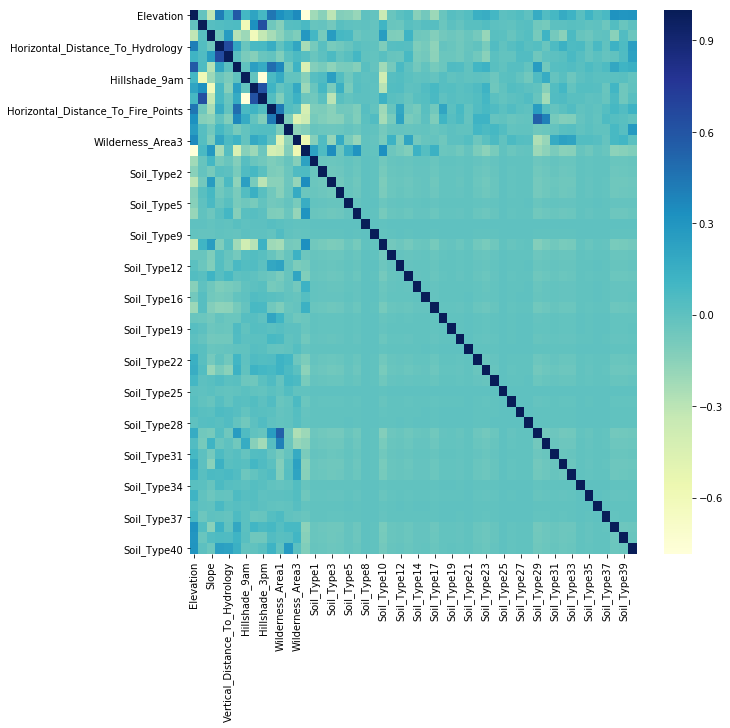

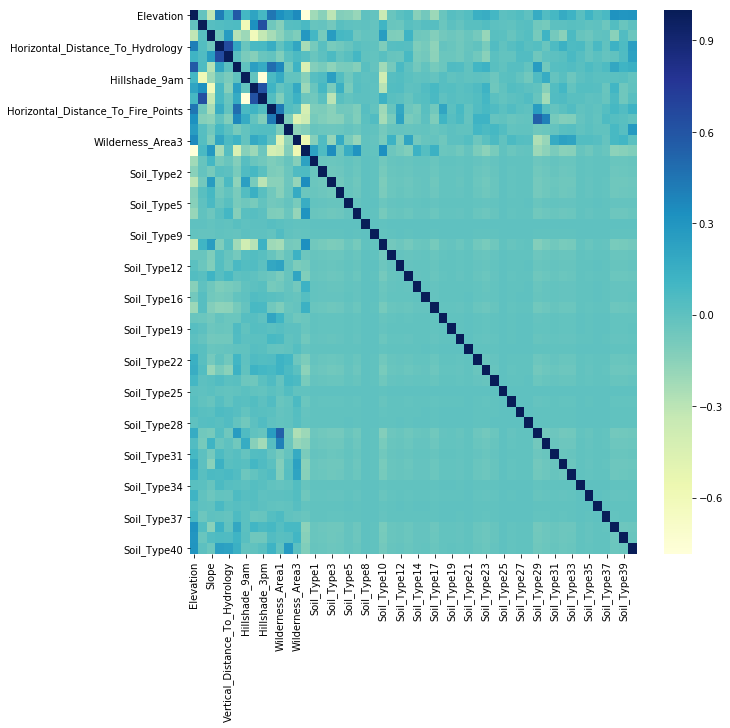

In [245]:
# Correlation of features with each other
p = sns.heatmap(X.corr(), cmap='YlGnBu')
fig = p.get_figure()
fig.set_size_inches(10,10)
fig

Looks like the correlations between soil types is relatively low so these are features that we should keep. 

### Modeling


In [64]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        #Create a model
        knn = KNeighborsClassifier(n_neighbors = i)
        #fit the model 
        knn.fit(mini_train_data.as_matrix(), mini_train_labels.as_matrix())
        # call the "predict" method
        dev_predicted_label = knn.predict(dev_data)
        # checking the accuracy on dev test
        accuracy = np.sum(dev_predicted_label == dev_labels)/len(dev_labels)
        print(f"for k = {i} accuracy on the dev data is : {format(accuracy)}")
        if i == 1:
            print(classification_report(dev_labels, dev_predicted_label))
    

    
### STUDENT END ###

k_values = [1, 3, 5, 7]
P2(k_values)

for k = 1 accuracy on the dev data is : 0.644620811287478
              precision    recall  f1-score   support

           1       0.53      0.50      0.51       658
           2       0.50      0.46      0.48       675
           3       0.56      0.53      0.54       638
           4       0.81      0.79      0.80       646
           5       0.67      0.77      0.72       615
           6       0.58      0.58      0.58       638
           7       0.83      0.89      0.86       666

   micro avg       0.64      0.64      0.64      4536
   macro avg       0.64      0.65      0.64      4536
weighted avg       0.64      0.64      0.64      4536

for k = 3 accuracy on the dev data is : 0.6256613756613757
for k = 5 accuracy on the dev data is : 0.6216931216931217
for k = 7 accuracy on the dev data is : 0.6172839506172839


In [180]:
model = GaussianNB()
model.fit(mini_train_data, mini_train_labels)
dev_predicted_label = model.predict(dev_data)
np.sum(dev_predicted_label == dev_labels)/len(dev_labels)

0.53086419753086422

In [172]:
model = RandomForestClassifier()
model.fit(mini_train_data, mini_train_labels)
dev_predicted_label = model.predict(dev_data)
np.sum(dev_predicted_label == dev_labels)/len(dev_labels)

In [183]:
model = LogisticRegression()
model.fit(mini_train_data, mini_train_labels)
dev_predicted_label = model.predict(dev_data)
np.sum(dev_predicted_label == dev_labels)/len(dev_labels)

0.64373897707231043

In [185]:
model = GradientBoostingClassifier()
model.fit(mini_train_data, mini_train_labels)
dev_predicted_label = model.predict(dev_data)
np.sum(dev_predicted_label == dev_labels)/len(dev_labels)

0.72817460317460314

In [187]:
model = SVC()
model.fit(mini_train_data, mini_train_labels)
dev_predicted_label = model.predict(dev_data)
np.sum(dev_predicted_label == dev_labels)/len(dev_labels)

0.62235449735449733

In [67]:
# Setup several baseline models and run them with parameter grids
# Use grid search to determine what can be obtained in terms of accuracy without any feature engineering
models = {'gauss' : GaussianNB, 
          'logit' : LogisticRegression, 
          'gboost' : GradientBoostingClassifier, 
          'knn': KNeighborsClassifier, 
          'rf' : RandomForestClassifier, 
          'svc' : SVC}
params = {}
params['logit'] = {'C': 1.0**np.arange(-5, 5)}
params['gboost'] = {'n_estimators': [50, 100, 150]}
params['knn'] = {'n_neighbors': [1,3,5,7]}
params['rf'] = {'n_estimators': [50, 100, 150]}
params['gauss'] = {'var_smoothing': 1.0**np.arange(-9, -1)}
params['svc'] = {'C': [0.1, 1.0, 10]}
ks = models.keys()

for k, model in models.items():
    print(f"Running {k}")
    gs = GridSearchCV(model(), params[k])
    gs.fit(mini_train_data, mini_train_labels)
    best = gs.best_estimator_
    print(best)
    print(gs.best_params_)
    dev_predicted_label = best.predict(dev_data)
    acc = accuracy(dev_predicted_label, dev_labels)
    print(acc)
    print('-'*80)
    


Running gauss
GaussianNB(priors=None, var_smoothing=1.0)
{'var_smoothing': 1.0}
0.447530864198
--------------------------------------------------------------------------------
Running logit


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'C': 1.0}
0.639329805996
--------------------------------------------------------------------------------
Running gboost
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
{'n_estimators': 50}
0.702821869489
----------------------------------

### Results

Random forest does well on the data, Gaussian/Logit not so great.